filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename :  RGB
filename

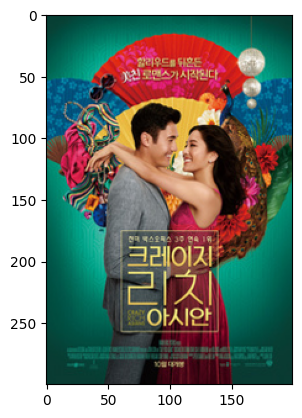

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

genre_mapping = {
    "드라마": 1 << 43,
    "첩보": 1 << 42,
    "옴니버스": 1 << 41,
    "뮤직": 1 << 40,
    "동성애": 1 << 39,
    "로드무비": 1 << 38,
    "아동": 1 << 37,
    "하이틴(고교)": 1 << 36,
    "전기": 1 << 35,
    "청춘영화": 1 << 34,
    "재난": 1 << 33,
    "문예": 1 << 32,
    "연쇄극": 1 << 31,
    "신파": 1 << 30,
    "활극": 1 << 29,
    "반공/분단": 1 << 28,
    "군사": 1 << 27,
    "계몽": 1 << 26,
    "사회물(경향)": 1 << 25,
    "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23,
    "종교": 1 << 22,
    "무협": 1 << 21,
    "미스터리": 1 << 20,
    "SF": 1 << 19,
    "코메디": 1 << 18,
    "느와르": 1 << 17,
    "액션": 1 << 16,
    "범죄": 1 << 15,
    "어드벤처": 1 << 14,
    "가족": 1 << 13,
    "에로": 1 << 12,
    "멜로/로맨스": 1 << 11,
    '멜로드라마': 1 << 11,
    "공포": 1 << 10,
    "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8,
    '실험': 1 << 7,
    '스릴러': 1 << 5,
    '서부': 1 << 4,
    '전쟁': 1 << 3,
    '갱스터': 1 << 2,
    '판타지': 1 << 1,
    '해양액션': 1 << 0
}

def titleList(fileName : str):
    
    movieNum = int(fileName.split('_')[1].split('.')[0]) #int(movie)
    titleListGenre = []
    for k, v in genre_mapping.items():
        titleListGenre.append(1 if v & movieNum else 0)
        
    return titleListGenre

def get_image_data_list(folder_path, target_size=(200, 300)):
    # 지원하는 이미지 확장자
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    
    # 이미지 데이터 목록을 저장할 리스트
    image_data_list = []
    image_genre_list = []
    # 폴더 내의 모든 파일을 순회
    for filename in os.listdir(folder_path):
        # 파일의 경로 생성
        file_path = os.path.join(folder_path, filename)
        
        # 파일이 이미지 확장자 중 하나인지 확인
        if filename.lower().endswith(image_extensions) and os.path.isfile(file_path):
            # 이미지를 열고 지정된 크기로 리사이즈
            # print(file_path, os.path.basename(file_path))
            img = Image.open(file_path)
            # 알파 채널이 있을 경우 제거 (RGBA -> RGB)
            print('filename : ', img.mode)
            if img.mode == 'RGBA' or img.mode == 'CMYK':
                # print("img.mode == 'RGBA'")
                img = img.convert('RGB')
            img_resized = img.resize(target_size)  # 크기 조정
            img_data = np.array(img_resized)  # 이미지를 NumPy 배열로 변환
            image_data_list.append(img_data)
            image_genre_list.append(titleList(os.path.basename(file_path)))

    return (image_data_list, image_genre_list)

folder_path = r'G:\내 드라이브\project_poster\x_train'
folder_test_path = r'G:\내 드라이브\project_poster\x_test'

# 데이터 준비
# x_train: 이미지 데이터 (배치 크기, 높이, 너비, 채널 수)
# y_train: 라벨 데이터 (배치 크기, 클래스 수)
images_data, images_genre = get_image_data_list(folder_path)
# print(np.array(images_data).shape)
x_train= np.array(images_data)
y_train= np.array(images_genre)

images_data_test, images_genre_test = get_image_data_list(folder_test_path)
for i in images_data_test:
  print('np.array(i).shape : ',np.array(i).shape)  
  plt.imshow(i)
  if np.array(i).shape[2] == 4:
      break
# print(np.array(images_data_test).shape)

x_test= np.array(images_data_test)
y_test= np.array(images_genre_test)

# num_classes = 3  # 예시: 고양이, 개, 새
# input_shape = (128, 128, 3)  # 입력 이미지 크기

# CNN 모델 정의
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=images_data[0].shape),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(len(images_genre[0]), activation='sigmoid')  # 각 클래스에 대해 확률 출력
# ])

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=images_data[0].shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),  # Conv 레이어 이후 드롭아웃 추가

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),  # Conv 레이어 이후 드롭아웃 추가

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),  # Conv 레이어 이후 드롭아웃 추가

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dense 레이어 이후 드롭아웃 추가

    layers.Dense(len(images_genre[0]), activation='sigmoid')  # 각 클래스에 대해 확률 출력
])


# 모델 컴파일
# history = model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping 콜백 추가 (모니터할 값: val_loss, patience: 10)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# 모델 학습
# 모델 학습 코드 예시
# history = model.fit(x_train, y_train, epochs=1000, batch_size=1)
# 모델 학습 (validation_split을 이용하여 검증 데이터를 분리)
history = model.fit(x_train, y_train, epochs=1000, batch_size=1, 
                    validation_split=0.2, callbacks=[early_stopping])

# 모델 저장
model_save_path = './genre_cnn2.keras'  # 저장할 경로 및 파일 이름
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# 예측
predictions = model.predict(x_test)

# TODO : 테스트셋 만들것. .. 에포크 100으로 상향. 히스토리 받아서 그래프 출력

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ... (genre_mapping 및 titleList, get_image_data_list 함수는 동일하게 유지)

# 데이터 준비
folder_path = r'G:\내 드라이브\project_poster\x_train'
folder_test_path = r'G:\내 드라이브\project_poster\x_test'

# 이미지 데이터 및 장르 라벨 가져오기
images_data, images_genre = get_image_data_list(folder_path)
x_train = np.array(images_data)
y_train = np.array(images_genre)

images_data_test, images_genre_test = get_image_data_list(folder_test_path)
x_test = np.array(images_data_test)
y_test = np.array(images_genre_test)

# VGG 모델 불러오기
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 300, 3))

# VGG 모델의 레이어 동결
for layer in base_model.layers:
    layer.trainable = False

# 새로운 모델 구성
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(images_genre[0]), activation='sigmoid')  # 각 클래스에 대해 확률 출력
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping 콜백 추가 (모니터할 값: val_loss, patience: 10)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# 데이터 증강을 위한 ImageDataGenerator 설정
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# 모델 학습
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=1000,
                    validation_data=test_datagen.flow(x_test, y_test),
                    callbacks=[early_stopping])

# 모델 저장
model_save_path = './genre_vgg.keras'  # 저장할 경로 및 파일 이름
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# 예측
predictions = model.predict(test_datagen.flow(x_test))

# 학습 히스토리 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


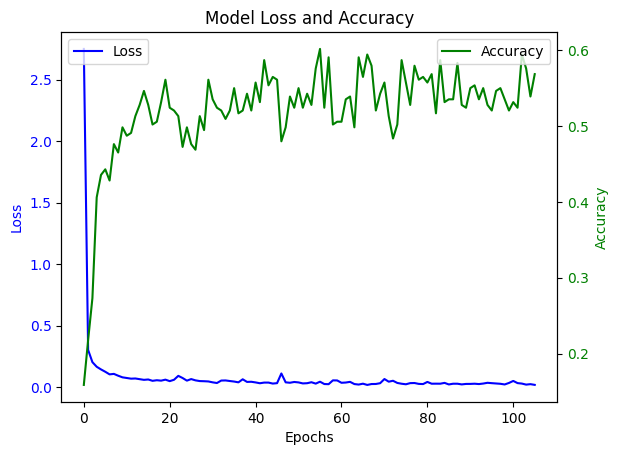

In [3]:
# 학습 기록으로 손실과 정확도 시각화
fig, ax1 = plt.subplots()

# 첫 번째 y축: 손실(Loss)
ax1.plot(history.history['loss'], color='blue', label='Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축: 정확도(Accuracy)
ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], color='green', label='Accuracy')
ax2.set_ylabel('Accuracy', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 그래프 제목 추가
plt.title('Model Loss and Accuracy')

# 범례(Legend) 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [1]:
history.history.keys()
history.history['val_accuracy']
predictions
# 예측 결과 해석
threshold = 0.5  # 확률이 0.5 이상이면 해당 장르로 간주
import cv2 as cv
for i, prediction in enumerate(predictions):
    predicted_genres = [genre for idx, genre in enumerate(genre_mapping.keys()) if prediction[idx] >= threshold]
    actual_genres = [genre for idx, genre in enumerate(genre_mapping.keys()) if y_test[i][idx] == 1]
    
    print(f"이미지 {i+1}:")
    img = cv.cvtColor(x_test[i], cv.COLOR_RGB2BGR)
    cv.imshow(f"  예측된 장르: {predicted_genres} : {actual_genres}", img)
    if cv.waitKey(0) == ord('q'):
        break
    cv.destroyWindow(f"  예측된 장르: {predicted_genres} : {actual_genres}")
    # plt.imshow(x_test[i])
    print(f"  예측된 장르: {predicted_genres}")
    print(f"  실제 장르: {actual_genres}")
    print()
cv.destroyAllWindows()


NameError: name 'history' is not defined

In [8]:
genre_mapping = {
    "드라마": 1 << 43,
    "첩보": 1 << 42,
    "옴니버스": 1 << 41,
    "뮤직": 1 << 40,
    "동성애": 1 << 39,
    "로드무비": 1 << 38,
    "아동": 1 << 37,
    "하이틴(고교)": 1 << 36,
    "전기": 1 << 35,
    "청춘영화": 1 << 34,
    "재난": 1 << 33,
    "문예": 1 << 32,
    "연쇄극": 1 << 31,
    "신파": 1 << 30,
    "활극": 1 << 29,
    "반공/분단": 1 << 28,
    "군사": 1 << 27,
    "계몽": 1 << 26,
    "사회물(경향)": 1 << 25,
    "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23,
    "종교": 1 << 22,
    "무협": 1 << 21,
    "미스터리": 1 << 20,
    "SF": 1 << 19,
    "코메디": 1 << 18,
    "느와르": 1 << 17,
    "액션": 1 << 16,
    "범죄": 1 << 15,
    "어드벤처": 1 << 14,
    "가족": 1 << 13,
    "에로": 1 << 12,
    "멜로/로맨스": 1 << 11,
    '멜로드라마': 1 << 11,
    "공포": 1 << 10,
    "공포(호러)": 1 << 10,
    "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8,
    '실험': 1 << 7,
    '스릴러': 1 << 5,
    '서부': 1 << 4,
    '전쟁': 1 << 3,
    '갱스터': 1 << 2,
    '판타지': 1 << 1,
    '해양액션': 1 << 0
}

# ['드라마', '첩보', '옴니버스', '뮤직', '동성애', '로드무비', '아동', '하이틴(고교)', '전기',
#        '청춘영화', '재난', '문예', '연쇄극', '신파', '활극', '반공/분단', '군사', '계몽',
#        '사회물(경향)', '스포츠', '합작(번안물)', '종교', '무협', '미스터리', 'SF', '코메디',
#        '느와르', '액션', '범죄', '어드벤처', '가족', '에로', '멜로/로맨스', '공포', '뮤지컬',
#        '시대극/사극', '실험', '스릴러', '서부', '전쟁', '갱스터', '판타지', '해양액션']

def genreIncode(strArr: list) -> int:
    """
    - 채연이가 만든 함수
    - strArr : 영화 제목 리스트
    - return : 제목 값 더한거
    """
    pass
    if strArr == 0:
        return 0 
    sum = 0
    for i in strArr:
        if i in genre_mapping:
            print(i, genre_mapping[i])
            sum += genre_mapping[i]
    return sum
            
# genreIncode(['드라마', '첩보'])
# genreIncode()genreIncode(['드라마', '첩보'])
# genreIncode(['스릴러', '공포','액션'])
print(f"큐브_{genreIncode(['공포(호러)','SF','스릴러','미스터리'])}")
# genreIncode(['멜로드라마'])

# 공포, 코메디, 액션, 판타지, 멜로

공포(호러) 1024
SF 524288
스릴러 32
미스터리 1048576
큐브_1573920
